In [1]:
%matplotlib inline
import math as mm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.optimize as op
from ipywidgets import interact

In [2]:
# truncates a number to n decimal points

def trunk(x,n):
    return (int(x*(10**n))/(10**n))

### Soave Redlich-Kwong equation of state

P = (RT)/(V-b) - a/(V(V+b))

    a = 0.42748*((R*Tc)^2/Pc)*(1+m*(1-sqrt(Tr))**2
    b = 0.08664*((R*Tc)/Pc)
   
    Tr = T/Tc

    m = 0.480 + 1.574*w - 0.176*w**2  


In [7]:
def PVchart(T = 288):
    # declare variables
    P = 3.310656891     # MPa
    R = 8.314472    # gas constant (cm^3*MPa/mol*K)
    #T = 278         # temperature (K)

    # Ethane's critical parameters
    Tc = 305.4    # critical temp (K)
    Pc = 4.88     # critical pressure (MPa)
    w = 0.099     # acentric factor

    Tr = T/Tc     # reduced temperature

    # Define functions
    m = 0.480 + 1.574*w - 0.176*(w**2)
    a = 0.42748*(((R*Tc)**2)/Pc)*(1+m*(1-mm.sqrt(Tr)))**2    
    b = 0.08664*((R*Tc)/Pc)

    # function to find roots
    def srk(Vm):
        return ((R*T)/(Vm-b) - a/(Vm*(Vm+b)) - P)

    # function to find P and plot
    def srkP(Vm):
        return (R*T)/(Vm-b) - a/(Vm*(Vm+b))

    i = 2
    lastVal = srk(i)
    cont = True
    roots = []
    
    while(cont):
        currentVal = srk(i) 
        if (lastVal/currentVal < 0):
            roots.append(op.newton(srk,i))
        elif (len(roots) >= 4) or (i > 1e6):
            cont = False            
        lastVal = currentVal
        i = i + 1
    
    if len(roots)>3:
        roots = roots[1:4]

    print(roots)
    print(op.fsolve(srk,[1,150]))
    # simulation
    V = np.linspace(1,2200,2200)
    P = []
    P = (srkP(V))

    #visualization
    plt.loglog(V,P)

    plt.xlabel('Volume [$cm^3/mol$]')
    plt.ylabel('Pressure [MPa]')
    plt.title('PV Diagram for Ethane')
    plt.grid()
    plt.plot([roots[0],roots[2]],[srkP(roots[0]),srkP(roots[2])],'o-')
    plt.text(200,7.5,[ "vapor vol: ",  trunk(roots[2],4) ])
    plt.text(200,5.5,[ "liquid vol: ",  trunk(roots[0],4) ])
    plt.axis([50,1000,-200,10])

[87.25638369878233, 276.3795371971188, 337.052119083776]
[  8.72347478e+01  -3.21140869e+08]


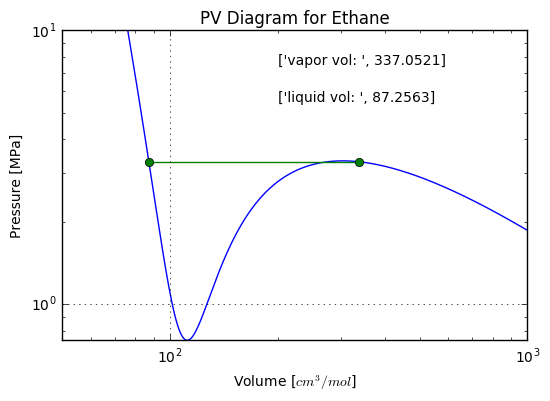

In [10]:
interact(PVchart, T = (279,293,1));